<h2><i><b> Email Spam Classification </b><i></h2>

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
!pip install wordcloud
from wordcloud import WordCloud
import nltk
from nltk.stem import PorterStemmer
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from string import punctuation
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.svm import SVC
import tkinter

<h2><i><b> Exploratory Data Analysis (EDA) <b></i></h2><br>
<ul>
    <li><i> Data Acquisition (Using Public dataset) </i></li>
    <li><i> Explore and Analyze the data </i></li>
    <li><i> Visualize the data Using WordCloud and Countplot </i></li>
</ul>

In [2]:
df = pd.read_csv(r'C:\Users\mohamed\Downloads\Spam-Filtering\Spam-Filtering.csv')

In [3]:
df.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], inplace=True, axis=1)
df.head(5)

,v1,v2
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [4]:
df.rename(columns = {'v1':'Class', 'v2':'E-mail'}, inplace=True)

In [5]:
df.head(5)

,Class,E-mail
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
print("Shape of The dataset: {}".format(df.shape))

Shape of The dataset: (5572, 2)


In [7]:
print("Checking for Missing Values in The dataset : \n{}".format(df.isnull().sum()))

Checking for Missing Values in The dataset : 
Class     0
E-mail    0
dtype: int64


In [8]:
print("Duplicates: {}".format(df.duplicated().sum()))

Duplicates: 403


In [9]:
df.drop_duplicates(inplace=True)

In [10]:
print("Shape of The dataset after dropping duplicates: {}".format(df.shape))

Shape of The dataset after dropping duplicates: (5169, 2)


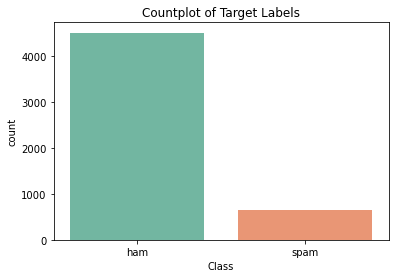

In [11]:
spam_counts = df['Class'].value_counts()
sns.countplot(x='Class', data=df, palette="Set2")
plt.title('Countplot of Target Labels')
plt.show()

In [12]:
print('Count of Spam E-mails is: {}'.format(spam_counts[1]))
print('Count of Non-Spam Emails is: {}'.format(spam_counts[0]))

Count of Spam E-mails is: 653
Count of Non-Spam Emails is: 4516


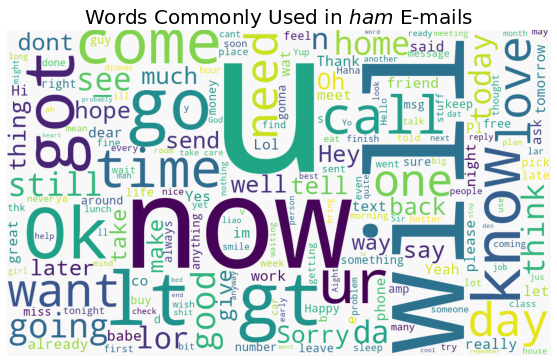

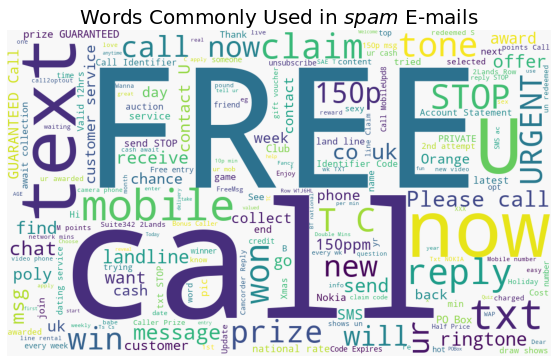

In [13]:
for label in ["ham", "spam"]:
    label_words = ' '.join(list(df[df['Class'] == label]['E-mail']))
    plt.figure(figsize=(10, 6))
    wc = WordCloud(width=1000, height=600, background_color="#f8f8f8")
    wc.generate_from_text(label_words)
    plt.imshow(wc)
    plt.axis("off")
    plt.title(f"Words Commonly Used in ${label}$ E-mails", size=20)
    plt.show()

<h2><i><b> Data Pre-processing </i></b></h2>
<ul>
    <li> LowerCasing </li>
    <li> Word-Tokenization </li>
    <li> Stop-words Removal </li>
    <li> Removing Punctuation and digits </li>
    <li> Word-Stemming </li>
    <li> Word-Lemmatization </li>
    <li> Replacing '\n' and '\t' with ' ' for cleaning. </li>
</ul>

In [14]:
df['E-mail'] = df['E-mail'].apply(lambda x: x.replace('\n', ' '))
df['E-mail'] = df['E-mail'].apply(lambda x: x.replace('\t', ' '))

In [15]:
df['E-mail'] = df['E-mail'].apply(lambda x:x.lower())

In [16]:
regexp = RegexpTokenizer('\w+')
df['Email-token'] = df['E-mail'].apply(regexp.tokenize)

In [17]:
df.head(5)

,Class,E-mail,Email-token
0,ham,"go until jurong point, crazy.. available only ...","[go, until, jurong, point, crazy, available, o..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, in, 2, a, wkly, comp, to, win, f..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, so, early, hor, u, c, already, t..."
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, i, don, t, think, he, goes, to, usf, he,..."


In [18]:
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('omw-1.4')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\mohamed\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


True

In [19]:
stopwords = nltk.corpus.stopwords.words('english')

In [20]:
df['Email-token'] = df['Email-token'].apply(lambda x: [item for item in x if item not in stopwords])

In [21]:
df['Email-token'] = df['Email-token'].apply(lambda x: [item for item in x if item not in punctuation])

In [22]:
df['Email-token'] = df['Email-token'].apply(lambda x: [item for item in x if not item.isdigit()])

In [23]:
df.head(5)

,Class,E-mail,Email-token
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n..."
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]"
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,..."
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]"
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]"


In [24]:
stem = PorterStemmer()
stemmed_text_list = []
for email in df['Email-token']:
    stemmed_list = []
    for token in email:
        stemmed_list.append(stem.stem(token))
    stemmed_text = " ".join(stemmed_list)
    stemmed_text_list.append(stemmed_text)

In [25]:
df['Stemmed'] = stemmed_text_list

In [26]:
df.head(5)

,Class,E-mail,Email-token,Stemmed
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkt 21st...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah think goe usf live around though


In [27]:
wordnet_lemmatizer = WordNetLemmatizer()
lemmatized_text_list = []
for email in df['Email-token']:
    lemmatized_list = []
    for token in email:
        lemmatized_list.append(wordnet_lemmatizer.lemmatize(token))
    lemmatized_text = " ".join(lemmatized_list)
    lemmatized_text_list.append(lemmatized_text)

In [28]:
df['lemmatized'] = lemmatized_text_list

In [29]:
df.head(5)

,Class,E-mail,Email-token,Stemmed,lemmatized
0,ham,"go until jurong point, crazy.. available only ...","[go, jurong, point, crazy, available, bugis, n...",go jurong point crazi avail bugi n great world...,go jurong point crazy available bugis n great ...
1,ham,ok lar... joking wif u oni...,"[ok, lar, joking, wif, u, oni]",ok lar joke wif u oni,ok lar joking wif u oni
2,spam,free entry in 2 a wkly comp to win fa cup fina...,"[free, entry, wkly, comp, win, fa, cup, final,...",free entri wkli comp win fa cup final tkt 21st...,free entry wkly comp win fa cup final tkts 21s...
3,ham,u dun say so early hor... u c already then say...,"[u, dun, say, early, hor, u, c, already, say]",u dun say earli hor u c alreadi say,u dun say early hor u c already say
4,ham,"nah i don't think he goes to usf, he lives aro...","[nah, think, goes, usf, lives, around, though]",nah think goe usf live around though,nah think go usf life around though


<h2><i><b> Feature Extraction </b></i></h2>
<p>(Transform raw data into feature vectors)<p>
<ul>
    <li> Label-Encoding </li>
    <li> Using Bag of Words approach for final data Preparation (CountVectorizer) </li>
</ul>

In [30]:
Le = LabelEncoder()
df['Class']=Le.fit_transform(df['Class'])

In [31]:
y = df['Class']

<p> Split the data into two (training and test) sets, then decide on evaluation matrix </p>

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df['lemmatized'], y, test_size = 0.3, random_state =42 )

In [33]:
vectorizer = CountVectorizer(stop_words='english')

In [34]:
count_train = vectorizer.fit_transform(X_train.values)

In [35]:
count_test = vectorizer.transform(X_test.values)

In [61]:
print(vectorizer.vocabulary_)

{'miss': 3289, 'ya': 5836, 'need': 3462, 'want': 5602, 'love': 3057, 'walked': 5588, 'hour': 2477, 'care': 957, 'wont': 5766, 'believe': 657, 'im': 2561, 'sitting': 4656, 'mu': 3384, 'waiting': 5581, 'suite': 4968, 'shower': 4607, 'yes': 5858, 'watching': 5622, 'footie': 2008, 'worried': 5781, 'going': 2196, 'blow': 740, 'phil': 3829, 'neville': 3486, 'yeah': 5848, 'lol': 3021, 'luckily': 3080, 'starring': 4857, 'role': 4360, 'like': 2966, 'din': 1516, 'tell': 5108, 'jus': 2778, 'fuck': 2077, 'babe': 568, 'sooooo': 4760, 'wish': 5732, 'sleep': 4676, 'bed': 642, 'lonely': 3024, 'dream': 1614, 'lt': 3076, 'gt': 2270, 'guess': 2277, 'easy': 1670, 'hey': 2402, 'got': 2220, 'mail': 3136, 'slow': 4690, 'using': 5476, 'biola': 702, 'fne': 1991, 'heard': 2370, 'abt': 224, 'tat': 5077, 'hi': 2405, 'elaine': 1703, 'today': 5247, 'meeting': 3219, 'confirmed': 1211, 'day': 1392, 'crab': 1278, 'running': 4390, 'sea': 4483, 'shore': 4597, 'wave': 5630, 'came': 934, 'cleared': 1108, 'footprint': 2009

In [37]:
vector = vectorizer.transform(X_train)
print(vector.shape)
print(type(vector))
print(vector.toarray())

(3618, 5901)
<class 'scipy.sparse.csr.csr_matrix'>
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [38]:
nb = MultinomialNB()

In [39]:
nb.fit(count_train, y_train)

MultinomialNB()

In [40]:
pred_nb = nb.predict(count_test)

In [41]:
print('Accuracy on test data is: {}'.format(metrics.accuracy_score(y_test, pred_nb)))

Accuracy on test data is: 0.9813023855577047


In [42]:
metrics.confusion_matrix(y_test, pred_nb, labels=[0,1])

array([[1319,   12],
       [  17,  203]], dtype=int64)

In [43]:
def plot_confusion_matrix(y_test,y_pred_class):
    from sklearn.metrics import confusion_matrix
    cm = confusion_matrix(y_test, y_pred_class)
    ax= plt.subplot()
    sns.heatmap(cm, annot=True, ax = ax); 
    ax.set_xlabel('Predicted labels')
    ax.set_ylabel('True labels')
    ax.set_title('Confusion Matrix'); 
    ax.xaxis.set_ticklabels(['Not-Spam', 'Spam']); ax.yaxis.set_ticklabels(['Not-Spam', 'Spam'])


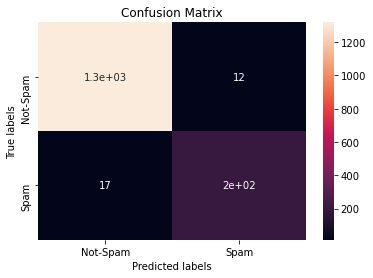

In [44]:
plot_confusion_matrix(y_test,pred_nb)

In [45]:
dt = tree.DecisionTreeClassifier()

In [46]:
dt.fit(count_train, y_train)

DecisionTreeClassifier()

In [47]:
pred_dt = dt.predict(count_test)

In [48]:
print('Accuracy on test data is: {}'.format(metrics.accuracy_score(y_test, pred_dt)))

Accuracy on test data is: 0.9671179883945842


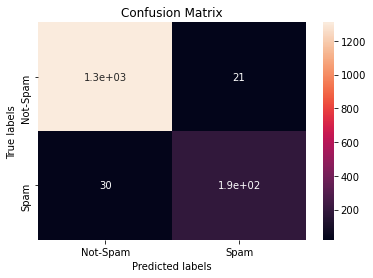

In [49]:
plot_confusion_matrix(y_test, pred_dt)

In [50]:
svm = SVC(kernel='rbf', probability=True)

In [51]:
svm.fit(count_train, y_train)

SVC(probability=True)

In [52]:
pred_svm = svm.predict(count_test)

In [53]:
print('Accuracy on test data is: {}'.format(metrics.accuracy_score(y_test, pred_svm)))

Accuracy on test data is: 0.9729206963249516


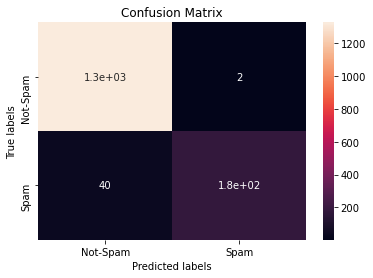

In [54]:
plot_confusion_matrix(y_test, pred_svm)

<p> -----------------------------------------------------------</p>

<p style='font-size:1.15em'><i> Comparing Support-vector-Machines, Decision-Tree Classifier to Naive Bayes Classifier, Naive Bayes Classifier seems to be the best Classifier for this dataset with accuracy score of .9813 </i></p>

<p>------------------------------------------------------------</p>

In [59]:
window = tkinter.Tk()
window.title('Spam Detection')
window.geometry('450x150')
window.configure(background= 'Wheat')
label = tkinter.Label(window,text = 'Type Your Message', font=('times',14,'bold','italic'),fg='#5f432c',bg='Wheat')
label.pack()

message = tkinter.Entry(window,width=400,borderwidth = 2)
message.pack()
result = tkinter.Label(window)
def email():
    global result
    result.destroy()
    global message
    text = message.get()
    
    lab = ['Not-Spam','Spam'] 
    X = vectorizer.transform([text]).toarray()
    pred = nb.predict(X)
    s = [str(i) for i in pred]
    a = int("".join(s))
    result = str("This message is "+ lab[a])
    result = tkinter.Label(window,text=result,font=('times',18,'italic'),fg = '#5f432c',bg='Wheat')
    result.pack() 
button = tkinter.Button(window, text='Click To Check',font=('times',12,'bold','italic'), fg = 'white',bg ='#5f432c',command = email)
button.pack()

window.mainloop()